# *Hate Speech Detection In Online Platforms

**1. Problem Statement **:
In today's digital age, hate speech on online platforms is a growing concern that impacts individuals and communities globally. Social media platform like Omegle, host billions of users who generate greate number of chat rooms daily. The business problem we are addressing is the need for an efficient, scalable, and accurate system to automatically detect and mitigate hate speech in Chat rooms.

**2. Solution Description **:
To address the problem of hate speech on Omegle platform, we propose developing a machine learning model that can automatically detect and categorize user-generated content into hate speech/offensive language and neutral content.

# Dataset Description:
**Data Sources**

Cyberbullying Data from Formspring.me:
Formspring is a site where people can chat anonymously about each other.
Contains instances of cyberbullying, which is a subset of hate speech, annotated for bullying and offensive content.
ConvAbuse Dataset:
Various texts have been collected by various chatbots from chats.
The dataset provided with a large number of texts with various labels like is_abuse, racist, sexism, generalized and so on.

**Final Dataset:**

The final dataset is a combination of both Cyberbullying Data from Formspring.me and ConvAbuse Datasets.
The dataset consists of 2 Columns:
Text: The text message.
Label: The label indicating whether the text is hate speech (1) or not (0).

The dataset has data shown below

# Dataset Characteristics:
Size of the dataset: 17,596

No. of columns: 2 - Text, Label

No. of records with label=1: 7,100

Percentage of hate records: 40.4%

Vocabulary Size: 22,147

# Data Visualization

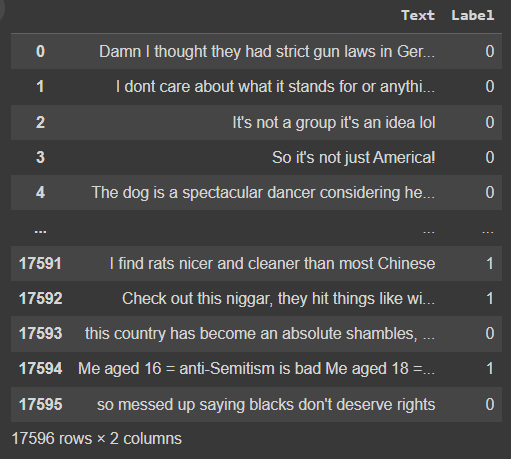

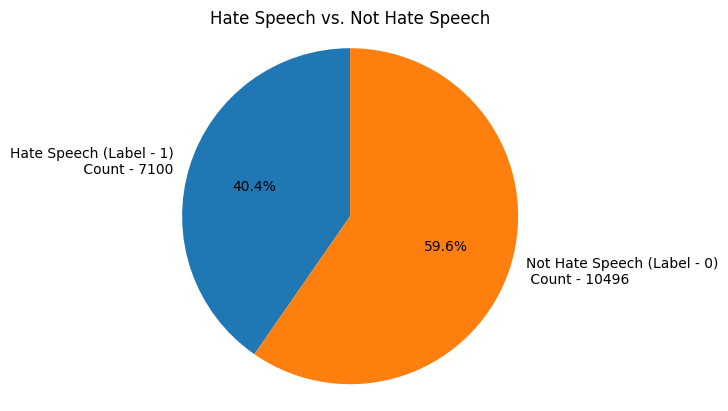

Test Split - 20% of Dataset - 3520 records

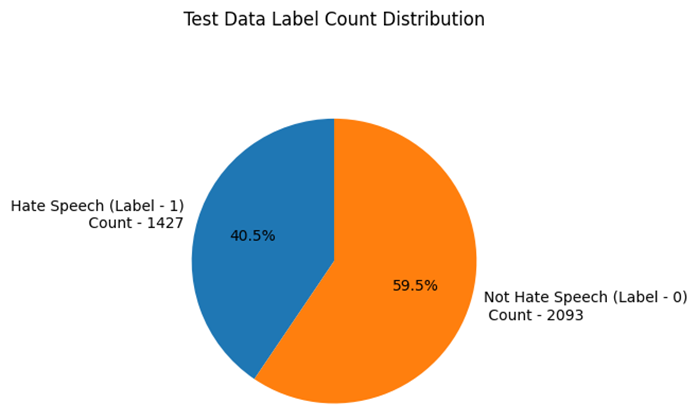

Validation split - 10% of Dataset - 1759 records

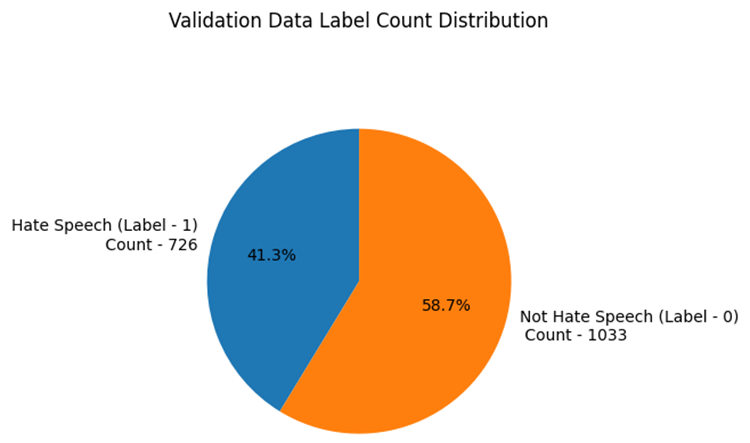

# Data Preprocessing
The first step in our hate speech detection model involves collecting and preprocessing the data. This step is crucial as the quality and cleanliness of the data significantly affect the model's performance.

After observing the dataset, we can infer that we need to clean and transform the raw text data into a format suitable for our model. This involves several sub-steps:

**Removing Extra Spaces:** Normalize the spacing in the text to remove any extra spaces.

**Removing usernames: **Same as for the URL, a username in a text won’t give any valuable information because it won’t be recognized as a word carrying meaning. We will then remove it.

**Removing Hashtags:** Hashtags are hard to apprehend, but usually contain useful information about the context of a text and its content. The problem with hashtags is that the words are all after the other, without a space. So to utilize this we only remove the hashtag character(#) and the remaining word is preserved.

**Handling Contractions:** Handling contractions in text is an important step in text preprocessing, especially for tasks like hate speech detection where understanding the full meaning of the words is crucial. Contractions are shortened forms of words or combinations of words created by omitting certain letters and sounds (e.g., "don't" for "do not", "I'm" for "I am").

**Lowercasing:** Convert all text to lowercase to ensure uniformity, as the model should treat "Hate" and "hate" as the same word.

**Removing Punctuation: **Strip out punctuation to focus on the words themselves.

**Removing URLs:** URLs do not give any information when we try to analyze text from words.

**Removing Short words:** Short words are the words whose length is less than three. Examples of this are - 'a', 'an', 'is' etc. Generally these words do not contain contextual meaning while detecting hate speech. Hence they can be removed.

**Lemmatization:** Lemmatization is the process of grouping together different inflected forms of the same word. The goal of lemmatization is to reduce a word to its root form, also called a lemma.

# Handling Imbalances in training data:

Resampling Training data using Random Oversampler:

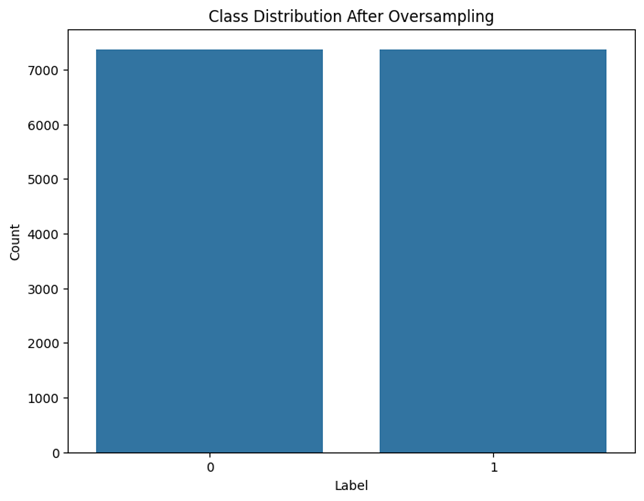

# Modeling:

**Machine Learning Models:**

Random Forest

k-nearest neighbors (KNN)

Logistic Regression

# Deep Learning Models:

Convolutional Neural Networks (CNN)

Recurrent Neural Networks (RNN)

Bidirectional Long Short Term Memory (LSTM) Model


# Final Deep Learning Model:

**Convolutional Neural Networks (CNN):**

A convolutional neural network (CNN or ConvNet) is a network architecture for deep learning that learns directly from data.CNNs are particularly useful for finding patterns in images to recognize objects, classes, and categories. They can also be quite effective for classifying audio, time-series, and signal data.






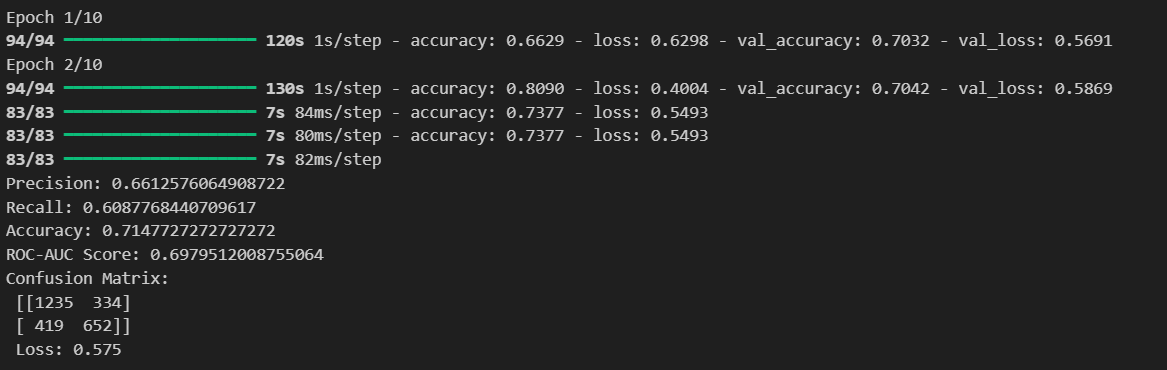

Model Compilation:
**bold text**
The model is compiled using the Adam optimizer. The loss function used is binary cross-entropy, suitable for binary classification tasks. The model's performance is evaluated using the AUC (Area Under the Curve) metric, named roc_auc.

**Early Stopping:**

An EarlyStopping callback is used to monitor the val_roc_auc metric. Training stops if the val_roc_auc does not improve for 3 consecutive epochs, and the best model weights are restored.

**Model Training:**

The model is trained on X_train and y_train for up to 15 epochs. A batch size of 64 is used. The early_stopping callback is included to prevent overfitting. The validation data (X_val, y_val) is used to monitor the model's performance during training.


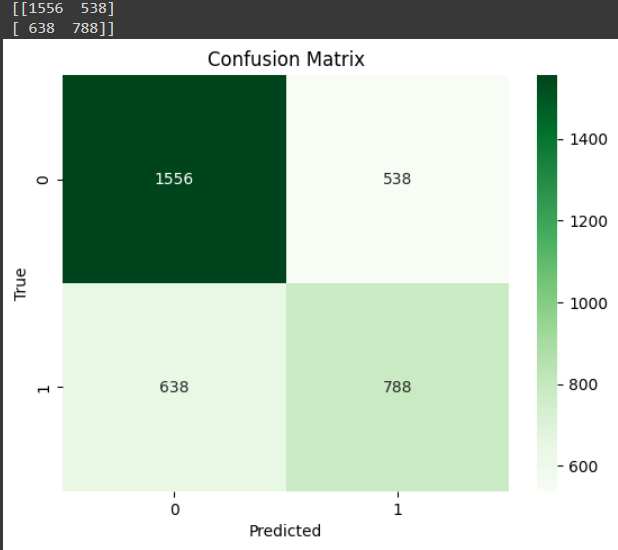

# Classification Report

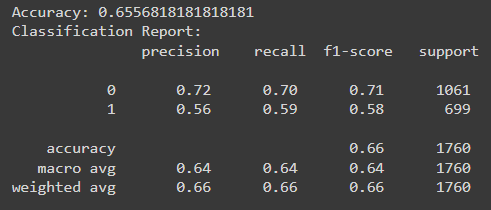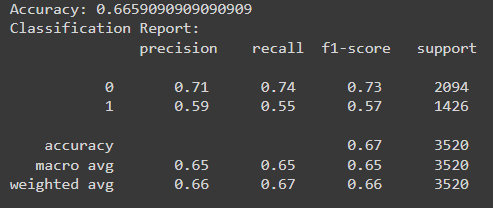

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/Hatespeech.keras')

# Check the loaded model's configuration
print(loaded_model.get_config())


{'name': 'sequential', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 20635), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 20635), 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 20635)}}, {'module': 'keras.layers', 'class_name': 'Reshape', 'config': {'name': 'reshape', 'train

In [34]:
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC(name='roc_auc')])


In [35]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 15.4 MB/s eta 0:00:00


In [37]:
test_cases = [
    "Savage needs treatment.",
    "This is so cute",
    "Silence, faggots.","Says the bankrupted gypsie."
]

In [38]:
# Preprocessing on test cases
def preprocessing_test_cases(test_cases):
  t_case_tokenization = [word_tokenize(text) for text in test_cases]
  # stopwords removeal
  stop_words = set(stopwords.words('english')) # Assuming you want to remove English stopwords
  t_case_stopword_remove = [remove_stop_words(tweet_tokens) for tweet_tokens in t_case_tokenization]

  # lemmetization
  t_case_lemmetization = []
  for text in t_case_stopword_remove: # Iterate over lists of words
    lemmas = [lemmatizer.lemmatize(word) for word in text] # Lemmatize each word individually
    t_case_lemmetization.append(lemmas)
  # joining tokens
  t_cases_joined = [' '.join(text) for text in t_case_lemmetization]
  return t_cases_joined
# preprocessed test cases
preprocessed_test_cases = preprocessing_test_cases(test_cases)

# Use TfidfVectorizer to transform test cases
t_cases_tfidf = tfidf.transform(preprocessed_test_cases)

# Predict classes for test cases
predictions = model.predict(t_cases_tfidf.toarray())

1/1 [==============================] - 0s 143ms/step


In [39]:
# predictions
prediction_classes = [0 if prediction.argmax() == 1 else 1 for prediction in predictions]

# Display results
for i, text in enumerate(test_cases):
    label = "Hate Speech" if prediction_classes[i] == 0 else "Not Hate Speech" # Use the correct variable name here
    print(f'Text: "{text}" - Prediction: {label}')

# Save predictions and test cases to a DataFrame
results_df = pd.DataFrame({'Text': test_cases, 'Prediction Class': prediction_classes})


Text: "Savage needs treatment." - Prediction: Hate Speech
Text: "This is so cute" - Prediction: Not Hate Speech
Text: "Silence, faggots." - Prediction: Hate Speech
Text: "Says the bankrupted gypsie." - Prediction: Hate Speech
